In [73]:
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv("HR_comma_sep.csv")
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [74]:
from sklearn.model_selection import train_test_split
p1=dataset['salary'].array
p2=dataset['left'].array
p1,p2

(<NumpyExtensionArray>
 [   'low', 'medium', 'medium',    'low',    'low',    'low',    'low',
     'low',    'low',    'low',
  ...
     'low',    'low',    'low',    'low',    'low',    'low',    'low',
     'low',    'low',    'low']
 Length: 14999, dtype: object,
 <NumpyExtensionArray>
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  ...
  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 Length: 14999, dtype: int64)

<Axes: xlabel='row_0'>

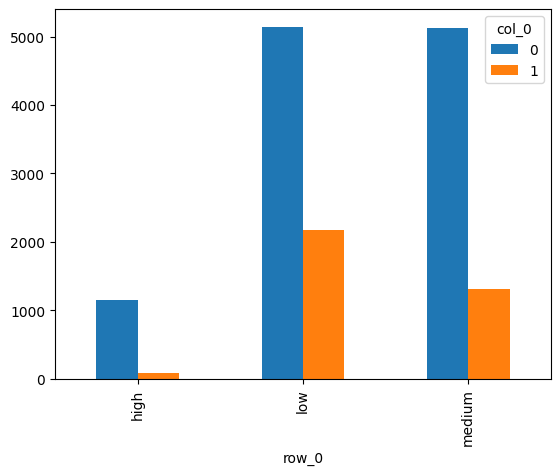

In [75]:
pd.crosstab(p1,p2).plot(kind='bar')

In [76]:
subdataset=dataset[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdataset.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [77]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
mapping = {'low': 0, 'medium': 1, 'high': 2}

# Map the column to numerical values
subdataset['salary'] = subdataset['salary'].map(mapping)

C:\Users\Hashir\AppData\Local\Temp\ipykernel_16580\571410890.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdataset['salary'] = subdataset['salary'].map(mapping)


In [78]:
subdataset.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,0
1,0.80,262,0,1
2,0.11,272,0,1
3,0.72,223,0,0
4,0.37,159,0,0


In [79]:

x_train,x_test,y_train,y_test=train_test_split(subdataset[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']],dataset.left,train_size=0.7)
model.fit(x_train, y_train)
t=model.predict(x_test)


In [80]:
model.score(x_train,y_train)

0.7849318982760263